# Regression Demo
<hr style="border:2px solid gray">

In [1]:
#imports
import pandas as pd

#explore imports
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy import stats

#preprocessing imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

#model/eval imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<hr style="border:2px solid gray">

## Acquisition


In [2]:
df = pd.read_csv('large_housing_dataset.csv')

In [3]:
df.sample(5)

,city,bedrooms,bathrooms,square_feet,price
408,Phoenix,2,1,1570,286994
388,New York,1,1,1315,125592
68,Houston,2,2,963,179141
422,Los Angeles,3,1,1261,716166
229,Houston,2,3,1856,557373


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         500 non-null    object
 1   bedrooms     500 non-null    int64 
 2   bathrooms    500 non-null    int64 
 3   square_feet  500 non-null    int64 
 4   price        500 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.7+ KB


<hr style="border:2px solid gray">

## Exploration

### Visualize

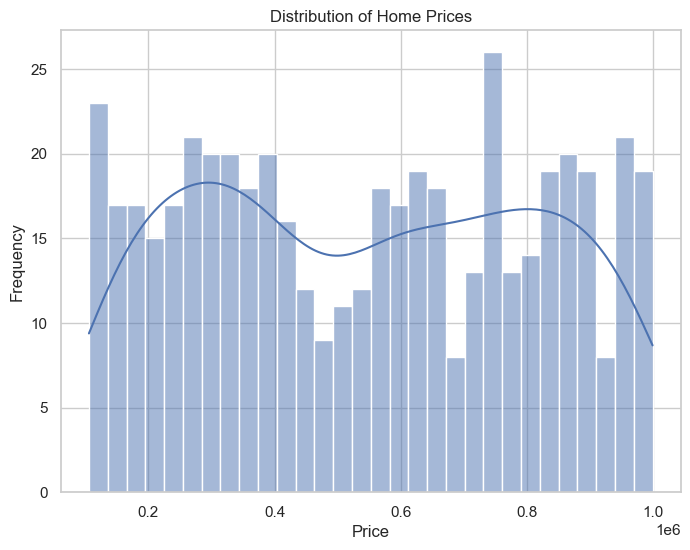

In [5]:
# Set up the plotting style
sns.set(style="whitegrid")

# Histogram of the target variable (price)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Home Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


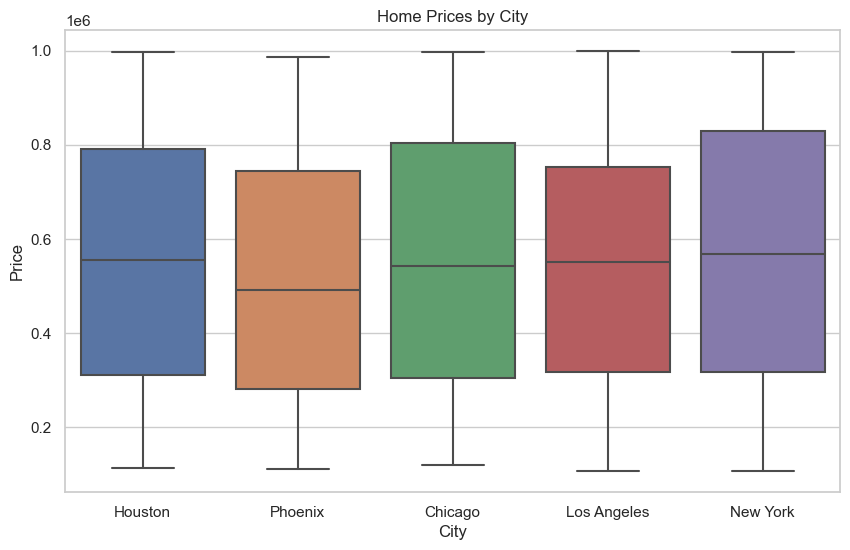

In [6]:
# Boxplot to show distribution of prices by city
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='price', data=df)
plt.title('Home Prices by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()


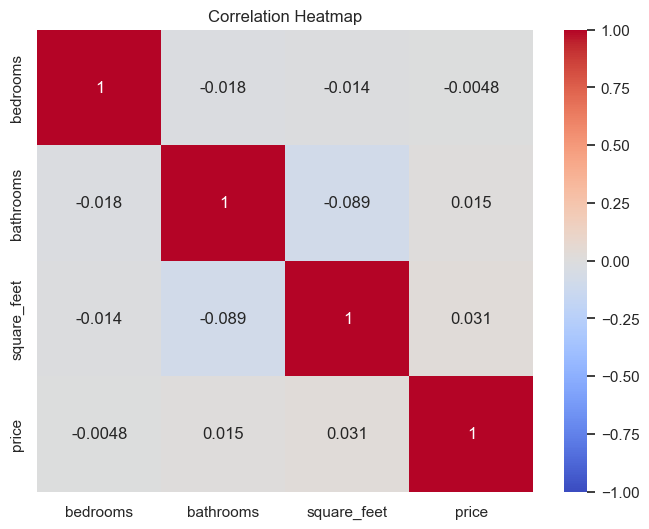

In [7]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[['bedrooms', 'bathrooms', 'square_feet', 'price']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<hr style="border:2px solid gray">

## Pre-processing


### Feature Engineering
<hr style="border:2px solid grey">

In [8]:
# Creating dummy variables for the 'city' column
df = pd.get_dummies(df, columns=['city'], drop_first=True)

In [9]:
#we can see those encoded values
df.head()

,bedrooms,bathrooms,square_feet,price,city_Houston,city_Los Angeles,city_New York,city_Phoenix
0,2,2,964,963051,1,0,0,0
1,4,3,2626,211453,0,0,0,1
2,4,1,1081,119816,0,0,0,0
3,1,3,2848,869299,0,0,0,1
4,2,2,753,965962,0,0,0,1


### Scaling
<hr style="border:2px solid grey">

In [10]:
# Initialize the scaler
scaler = MinMaxScaler()

# Scaling the numeric features
df[['bedrooms', 'bathrooms', 'square_feet']] = scaler.fit_transform(df[['bedrooms', 'bathrooms', 'square_feet']])

df.head()

,bedrooms,bathrooms,square_feet,price,city_Houston,city_Los Angeles,city_New York,city_Phoenix
0,0.333333,0.5,0.151566,963051,1,0,0,0
1,1.000000,1.0,0.845511,211453,0,0,0,1
2,1.000000,0.0,0.200418,119816,0,0,0,0
3,0.000000,1.0,0.938205,869299,0,0,0,1
4,0.333333,0.5,0.063466,965962,0,0,0,1


### Split data
<hr style="border:2px solid grey">

In [11]:
# Defining the features and target variable
X = df.drop(columns='price')
y = df['price']

In [12]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#look at features
X_train.head()

,bedrooms,bathrooms,square_feet,city_Houston,city_Los Angeles,city_New York,city_Phoenix
249,0.666667,1.0,0.787474,0,0,0,0
433,1.000000,0.5,0.146555,0,0,0,0
19,0.666667,0.0,0.044259,1,0,0,0
322,1.000000,1.0,0.525261,0,1,0,0
332,0.666667,0.0,0.164092,0,0,1,0


In [14]:
y

0      963051
1      211453
2      119816
3      869299
4      965962
        ...  
495    105901
496    262624
497    322317
498    393199
499    793045
Name: price, Length: 500, dtype: int64

In [15]:
#we can see this is 80%
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 249 to 102
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          400 non-null    float64
 1   bathrooms         400 non-null    float64
 2   square_feet       400 non-null    float64
 3   city_Houston      400 non-null    uint8  
 4   city_Los Angeles  400 non-null    uint8  
 5   city_New York     400 non-null    uint8  
 6   city_Phoenix      400 non-null    uint8  
dtypes: float64(3), uint8(4)
memory usage: 14.1 KB


In [16]:
#look at target
y_train.head()

249    255683
433    743552
19     371991
322    628646
332    209847
Name: price, dtype: int64

In [17]:
#we can see this is 20%
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 361 to 15
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          100 non-null    float64
 1   bathrooms         100 non-null    float64
 2   square_feet       100 non-null    float64
 3   city_Houston      100 non-null    uint8  
 4   city_Los Angeles  100 non-null    uint8  
 5   city_New York     100 non-null    uint8  
 6   city_Phoenix      100 non-null    uint8  
dtypes: float64(3), uint8(4)
memory usage: 3.5 KB


### Feature Selection

In [18]:
# Apply SelectKBest to choose the best k features
selector = SelectKBest(score_func=f_regression, k=3)  # Choosing top 3 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Print the scores of each feature
print("Feature Scores:", selector.scores_)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Feature Scores: [9.86449337e-02 1.40479591e-03 2.30453268e-01 5.87114356e-03
 1.01900599e-03 7.99502776e-02 1.21363488e+00]
Selected Features: Index(['bedrooms', 'square_feet', 'city_Phoenix'], dtype='object')


<hr style="border:2px solid gray">

## Model
<hr style="border:2px solid grey">

In [19]:
#baseline
df['baseline']=y.mean()
df['baseline']

0      544706.454
1      544706.454
2      544706.454
3      544706.454
4      544706.454
          ...    
495    544706.454
496    544706.454
497    544706.454
498    544706.454
499    544706.454
Name: baseline, Length: 500, dtype: float64

In [20]:
# Creating the Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

In [21]:
# Train a Linear Regression model using the selected features
model2 = LinearRegression()
model2.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred2 = model2.predict(X_test_selected)


<hr style="border:2px solid grey">

###  Evaluate

In [22]:
# Calculate RMSE for the baseline (predicting the mean for all houses)
baseline_rmse = mean_squared_error(y_test, [y.mean()] * len(y_test), squared=False)
print("Baseline RMSE:", baseline_rmse)

Baseline RMSE: 271692.98864116665


In [23]:
# Calculating RMSE with all features
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 274053.82845606783


In [24]:
# Calculate RMSE with best features
rmse = mean_squared_error(y_test, y_pred2, squared=False)
print("RMSE with SelectKBest Features:", rmse)

RMSE with SelectKBest Features: 272628.3476787889


<hr style="border:2px solid gray">
<hr style="border:2px solid gray">
